In [1]:
from src.scripts.util.common import Dataset, State, load_test,TARGET_COL
import pandas as pd

PREDICTIONS_DICT = "C:\\Users\\Asia\\Documents\\Projekty\\PyCharm Projects\\text-classification\\results\\predictions\\"
DIAGRAM_DICT = "C:\\Users\\Asia\\Documents\\Projekty\\PyCharm Projects\\text-classification\\results\\diagrams\\"
METRICS_DICT = "C:\\Users\\Asia\\Documents\\Projekty\\PyCharm Projects\\text-classification\\results\\metrics\\"

In [15]:
clfs = ["rf","knn", "log", "svc"]
columns = [f"{s.value}-{m}" for m in ["roc", "pr"] for s in [State.BIO,State.STD, State.DOUBLE]]
index = [f"{d.value}-{c}" for c in clfs for d in Dataset]
df_scores_macro =pd.DataFrame(columns=columns, index=index)

In [3]:
from sklearn.metrics import precision_score, roc_auc_score

In [16]:
for d in Dataset:
    for s in [State.BIO,State.STD, State.DOUBLE]:
        for c in ['log', 'rf','knn', 'svc']:
            y_pred = pd.read_csv(PREDICTIONS_DICT + f"predictions-{d.value}-{s.value}-{c}-balanced.csv",index_col=0)["predictions"]
            _, y_true= load_test(d,s)
            y_scores = pd.read_csv(PREDICTIONS_DICT + f"scores-{d.value}-{s.value}-{c}-balanced.csv",index_col=0)

            # Sort index to make sure examples are compared with the right predictions and scores
            y_true = y_true.sort_index()
            y_pred = y_pred.sort_index()
            y_scores = y_scores.sort_index()

            # calculate roc auc scores and average precision
            if d == Dataset.IMDB or d == Dataset.DISASTERS:
                if d == Dataset.IMDB:
                    pos_label ="positive"
                else:
                    pos_label ="Relevant"

                score_binary = precision_score(y_true, y_pred, pos_label=pos_label, zero_division=0)
                df_scores_macro.loc[f"{d.value}-{c}"][f"{s.value}-pr"] = score_binary
                roc_binary_macro = roc_auc_score(y_true, y_scores[pos_label], average='macro')
                df_scores_macro.loc[f"{d.value}-{c}"][f"{s.value}-roc"] = roc_binary_macro

            # multi class classification metrics are handled slightly different
            else:
                score_macro = precision_score(y_true, y_pred, average='macro', zero_division=0)
                df_scores_macro.loc[f"{d.value}-{c}"][f"{s.value}-pr"] = score_macro
                roc_macro = roc_auc_score(y_true, y_scores, average='macro', multi_class='ovr')
                df_scores_macro.loc[f"{d.value}-{c}"][f"{s.value}-roc"] = roc_macro

In [17]:
def df_to_latex (df: pd.DataFrame, label:str, caption):
    latex = "\\begin{table}[!h] \label{" +label+ "} \centering\n" \
            "\caption{" + caption + "}" \
            "\\begin{tabular}{"
    cols = df.columns.tolist()
    latex += '| c ' * (len(cols) + 1)
    latex += '|}\hline \n'
    latex += "Zbiór danych & " + " & ".join(cols)  + "\\\\ \cline{3-8} \n"

    for index,row in df.iterrows():
        latex += str(index) + " & "
        for c in cols:
            latex +=  "{0:.2f}".format(row[c]) + " & "
        latex = latex[:-2]  #delete last &
        latex += "\\\\ \cline{2-8}\n"

    latex += "\end{tabular}\n\end{table}\n"
    return latex
print(df_to_latex(df_scores_macro, "tab:scores:macro","Wyniki macro"))

\begin{table}[!h] \label{tab:scores:macro} \centering
\caption{Wyniki macro}\begin{tabular}{| c | c | c | c | c | c | c |}\hline 
Zbiór danych & bio-roc & std-roc & double-roc & bio-pr & std-pr & double-pr\\ \cline{3-8} 
ag-news-rf & 0.97 & 0.97 & 0.97 & 0.87 & 0.86 & 0.87 \\ \cline{2-8}
disasters-rf & 0.84 & 0.84 & 0.82 & 0.81 & 0.82 & 0.79 \\ \cline{2-8}
bbc-rf & 1.00 & 1.00 & 1.00 & 0.96 & 0.96 & 0.97 \\ \cline{2-8}
fine-foods-rf & 0.85 & 0.83 & 0.85 & 0.92 & 0.93 & 0.92 \\ \cline{2-8}
imdb-rf & 0.93 & 0.92 & 0.93 & 0.83 & 0.82 & 0.84 \\ \cline{2-8}
ag-news-knn & 0.89 & 0.94 & 0.89 & 0.44 & 0.79 & 0.44 \\ \cline{2-8}
disasters-knn & 0.77 & 0.78 & 0.78 & 0.00 & 0.00 & 1.00 \\ \cline{2-8}
bbc-knn & 0.99 & 0.99 & 0.99 & 0.85 & 0.81 & 0.85 \\ \cline{2-8}
fine-foods-knn & 0.73 & 0.71 & 0.74 & 0.93 & 0.93 & 0.93 \\ \cline{2-8}
imdb-knn & 0.82 & 0.76 & 0.82 & 0.62 & 0.68 & 0.74 \\ \cline{2-8}
ag-news-log & 0.96 & 0.96 & 0.96 & 0.85 & 0.84 & 0.85 \\ \cline{2-8}
disasters-log & 0.81 & 0.82 &

In [13]:
df_scores_macro.to_csv(f"{METRICS_DICT}\\scores-macro.csv")

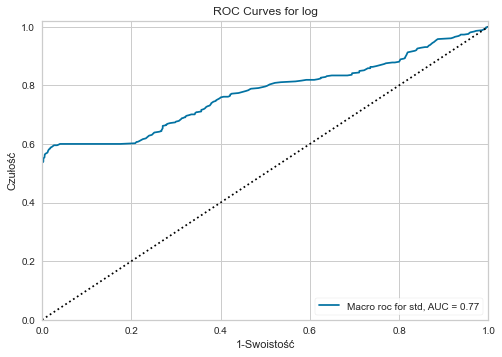

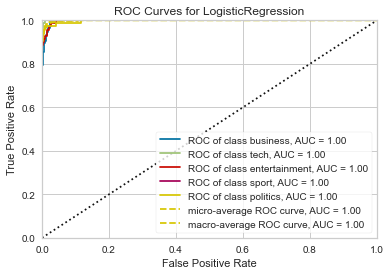

<AxesSubplot:title={'center':'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

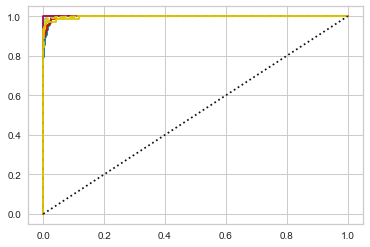

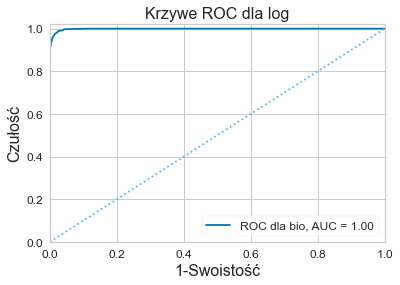

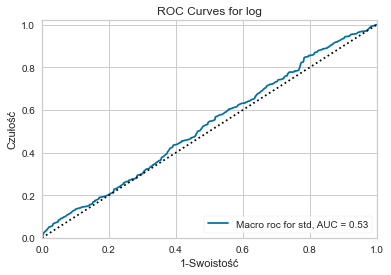